In [205]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


In [206]:
train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load Test

In [207]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [208]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [210]:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

train_data.drop(columns=['PassengerId', "Name"], inplace=True)
test_data.drop(columns=['PassengerId', "Name"], inplace=True)

In [211]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [212]:
train_data.insert(loc=len(train_data.columns), column="Deck", value="")
test_data.insert(loc=len(test_data.columns), column="Deck", value="")

train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else "U")
test_data['Deck'] = test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else "U")

In [213]:
pclass_survive = pd.crosstab(train_data["Deck"], train_data["Survived"])
pclass_survive

Survived,0,1
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
U,481,206


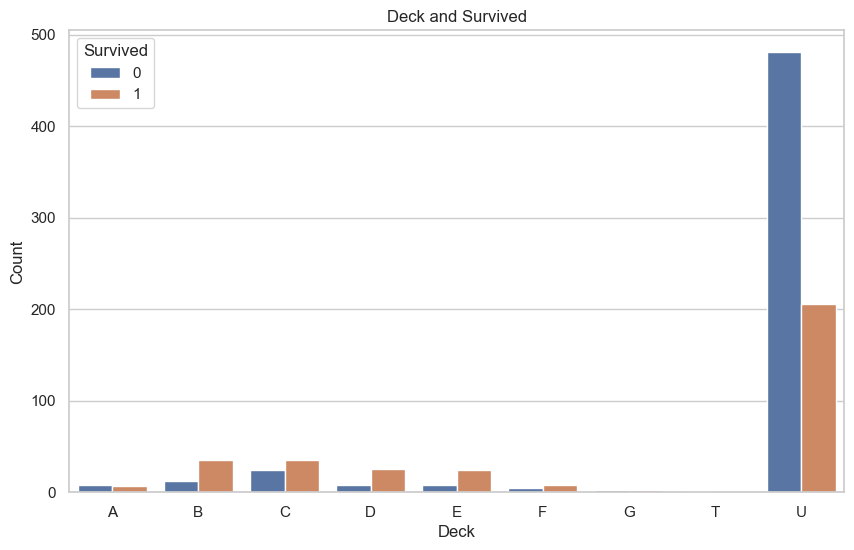

In [214]:
pclass_long = (
    pclass_survive
    .reset_index()               
    .melt(id_vars="Deck",        
          var_name="Survived",   
          value_name="Count") 
)
plt.figure(figsize=(10,6))
sns.barplot(data=pclass_long, x="Deck", y="Count", hue="Survived")

plt.title("Deck and Survived")
plt.ylabel("Count")
plt.xlabel("Deck")
plt.legend(title="Survived")
plt.show()

In [215]:
print(train_data["Deck"].isna().sum())
print(test_data["Deck"].isna().sum())

0
0


In [216]:
# Output percentage
pclass_survive_percentage = pclass_survive.div(pclass_survive.sum(axis=1), axis=0) * 100
pclass_survive_percentage

Survived,0,1
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000
U,70.014556,29.985444


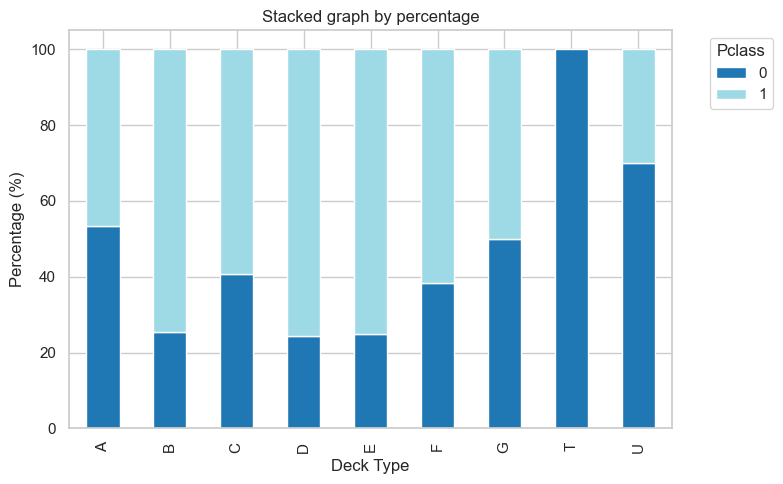

In [217]:
sns.set_theme(style="whitegrid")
ax = pclass_survive_percentage.plot(kind="bar", stacked=True, figsize=(8,5), colormap="tab20")

plt.ylabel("Percentage (%)")
plt.xlabel("Deck Type")
plt.title("Stacked graph by percentage")
plt.legend(title="Pclass", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [218]:
train_data["Deck"] = train_data["Deck"].replace(["A", "B", "C", "T"], "Group 1")
train_data["Deck"] = train_data["Deck"].replace(["D", "E"], "Group 2")
train_data["Deck"] = train_data["Deck"].replace(["F", "G"], "Group 3")
train_data["Deck"] = train_data["Deck"].replace(["U"], "Group 4")

test_data["Deck"] = test_data["Deck"].replace(["A", "B", "C", "T"], "Group 1")
test_data["Deck"] = test_data["Deck"].replace(["D", "E"], "Group 2")
test_data["Deck"] = test_data["Deck"].replace(["F", "G"], "Group 3")
test_data["Deck"] = test_data["Deck"].replace(["U"], "Group 4")

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,NaN,S,Group 4
1,1,1,female,38.0,1,0,71.2833,C85,C,Group 1
2,1,3,female,26.0,0,0,7.9250,NaN,S,Group 4
3,1,1,female,35.0,1,0,53.1000,C123,S,Group 1
4,0,3,male,35.0,0,0,8.0500,NaN,S,Group 4


In [219]:
train_data.drop(columns="Cabin", inplace=True)
test_data.drop(columns="Cabin", inplace=True)

In [220]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Deck         0
dtype: int64

In [221]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [222]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

0
0


In [223]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['Sex', 'Embarked', 'Deck'], dtype='object')


In [224]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = pd.get_dummies(train_data, columns=['Embarked', "Deck"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked', "Deck"], drop_first=True)


In [225]:
print(train_data.select_dtypes(include=['object']).columns)

Index([], dtype='object')


Survived
0    549
1    342
Name: count, dtype: int64


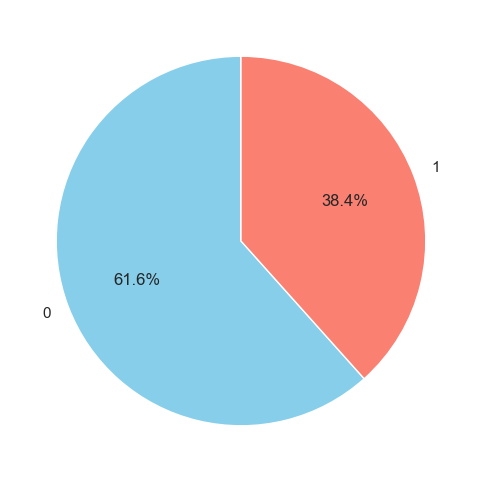

In [226]:
counts = train_data["Survived"].value_counts()
print(counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

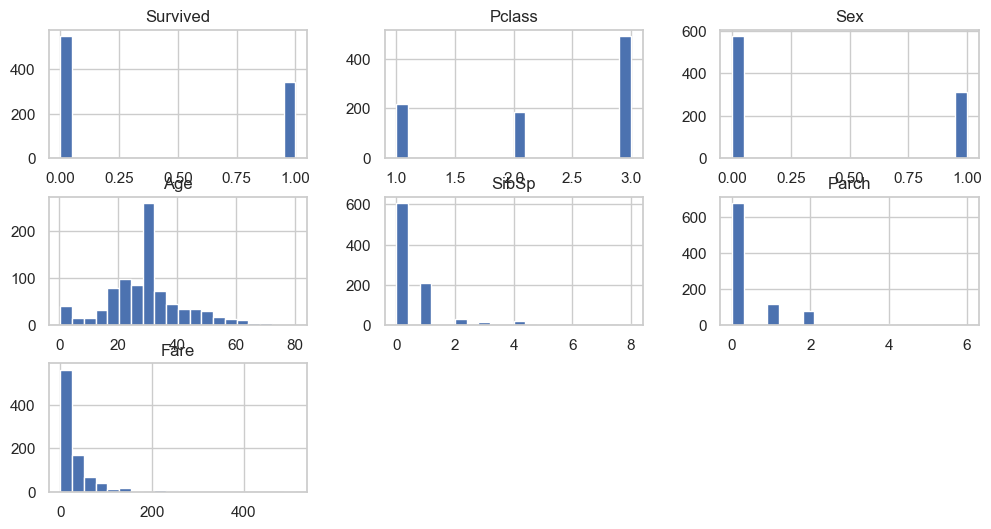

In [227]:
train_data.hist(figsize=(12, 6), bins = 20, sharex = False, sharey = False)

In [228]:
train_data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

Survived       Axes(0.125,0.53;0.133621x0.35)
Pclass      Axes(0.285345,0.53;0.133621x0.35)
Sex          Axes(0.44569,0.53;0.133621x0.35)
Age         Axes(0.606034,0.53;0.133621x0.35)
SibSp       Axes(0.766379,0.53;0.133621x0.35)
Parch          Axes(0.125,0.11;0.133621x0.35)
Fare        Axes(0.285345,0.11;0.133621x0.35)
dtype: object

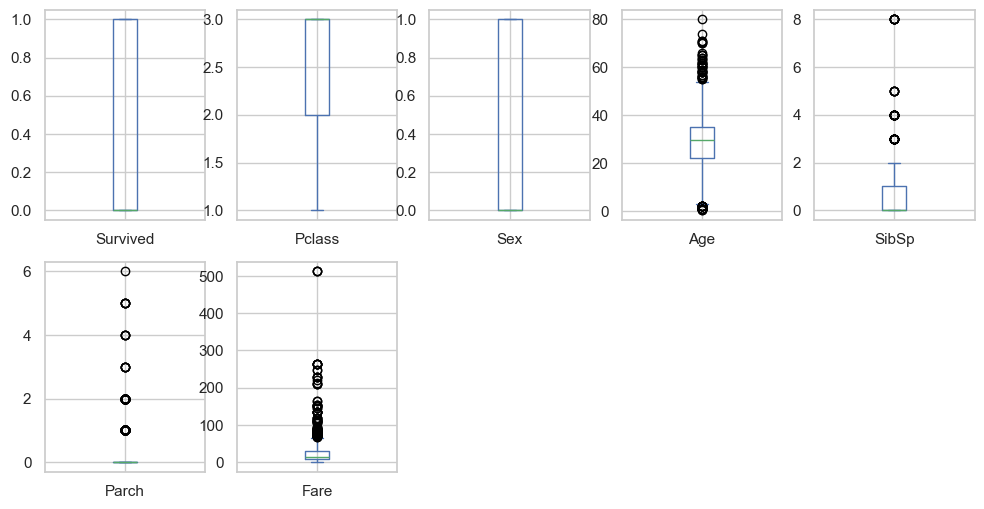

In [229]:
train_data.plot(kind="box", subplots=True, layout=(2, 5), sharex=False, sharey=False, figsize=(12,6))

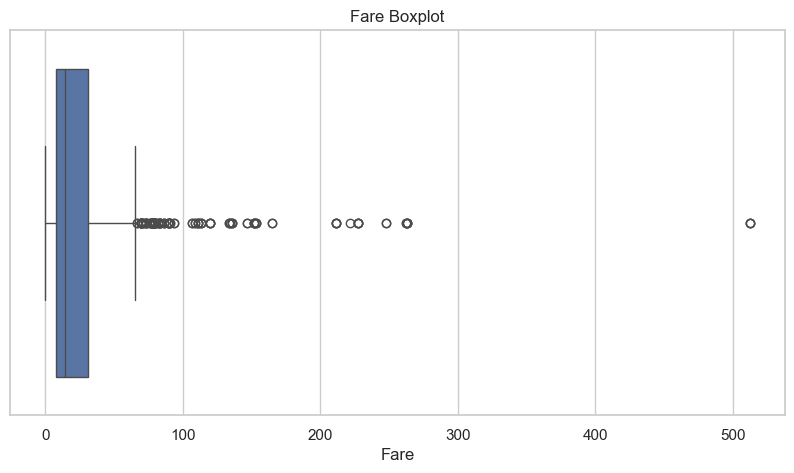

In [230]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Fare'])
plt.title('Fare Boxplot')
plt.show()

In [231]:
train_data['Fare'] = train_data['Fare'].apply(np.log1p)
test_data['Fare'] = test_data['Fare'].apply(np.log1p)

In [232]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.transform(test_data[[col]])


<Axes: >

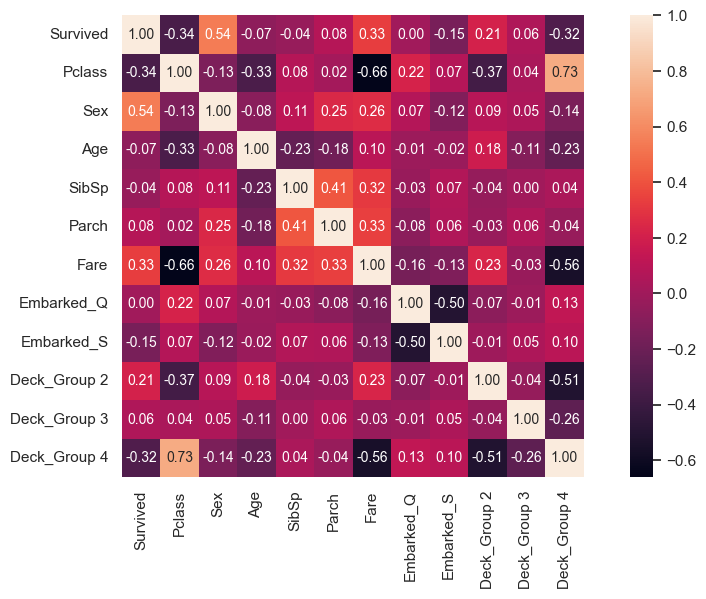

In [233]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

corrMat = train_data.corr()
plt.subplots(figsize=(12, 6))
sns.heatmap(corrMat, annot = True, fmt='.2f', annot_kws={'size': 10}, vmax=1.0, square=True)


In [234]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200),
    'XGBoost': XGBClassifier(
                n_estimators=600,          # nhiều cây hơn, học mượt hơn
                learning_rate=0.02,        # giảm tốc độ học (ổn định hơn)
                max_depth=3,               # tránh overfit
                subsample=0.8,             # chọn ngẫu nhiên 80% mẫu mỗi cây
                colsample_bytree=0.8,      # chọn ngẫu nhiên 80% feature mỗi cây
                min_child_weight=1,        # cho phép chia nhỏ nếu có ít mẫu
                gamma=0,                   # độ phạt chia node, giữ 0 hoặc nhỏ
                reg_alpha=0.1,             # L1 regularization nhẹ
                reg_lambda=1,              # L2 regularization mặc định
                eval_metric='logloss',
                random_state=42,
                n_jobs=-1,
            ),
    "SVC": SVC(
        kernel="rbf",     
        probability=True,
        random_state=42,
        C=1.0,
        gamma="scale"
    ),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1]

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC:  {roc_auc:.4f}")
    print("-" * 30)

Logistic Regression Results:
  Accuracy: 0.7933
  F1 Score: 0.7176
  ROC AUC:  0.8362
------------------------------
Random Forest Results:
  Accuracy: 0.7933
  F1 Score: 0.7132
  ROC AUC:  0.8387
------------------------------
XGBoost Results:
  Accuracy: 0.7989
  F1 Score: 0.7097
  ROC AUC:  0.8182
------------------------------
SVC Results:
  Accuracy: 0.8156
  F1 Score: 0.7402
  ROC AUC:  0.8411
------------------------------


In [236]:
best_model = SVC(
        kernel="rbf",     
        probability=True,
        random_state=42,
        C=1.0,
        gamma="scale"
    )
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)

print("Actual values (first 10):")
print(y_val.head(10))

print("\nPredicted values (first 10):")
print(pd.Series(y_val_pred).head(10))


Actual values (first 10):
565    0
160    0
553    1
860    0
241    1
559    1
387    1
536    0
698    0
99     0
Name: Survived, dtype: int64

Predicted values (first 10):
0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    0
9    0
dtype: int64


In [237]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

Confusion Matrix:
[[99 11]
 [22 47]]


In [238]:
# Re-create the original dataset.
test_data_orig = pd.read_csv("./kaggle/input/titanic/test.csv")

# Get the predicted data from test
test_preds = best_model.predict(test_data)

# Create a submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Export to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.
